In [2]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2, SelectKBest

In [3]:
df = pd.read_csv('file.csv')
df.head()

,mfccs_mean,mfccs_median,mfccs_max,mfccs_min,mfccs_std,mel_mean,mel_median,mel_max,mel_min,mel_std,...,spectral_flux_max,spectral_flux_min,spectral_flux_std,spectral_rolloff_mean,spectral_rolloff_median,spectral_rolloff_max,spectral_rolloff_min,spectral_rolloff_std,emotion,file_name
0,-5.812466,-5.827787,-3.721297,-8.339727,0.762716,0.027063,0.002714,0.469736,0.000834,0.078997,...,8.194613,0.0,1.354524,3618.056641,3773.693848,4888.037109,1754.956055,795.561944,neu,Ses01F_script02_1_F000
1,-6.279152,-6.264601,-4.491366,-7.900671,0.766000,0.003843,0.002153,0.014277,0.000815,0.003439,...,5.997219,0.0,1.130792,3911.092248,3897.509766,5167.968750,2573.217773,784.905594,fru,Ses01F_script02_1_F001
2,-6.032004,-6.050348,-4.080398,-8.196134,0.800140,0.116734,0.023000,0.568310,0.000831,0.164862,...,8.875613,0.0,1.384248,2608.953728,2465.551758,5813.964844,1367.358398,998.802054,neu,Ses01F_script02_1_F004
3,-5.479732,-5.383932,-2.633090,-8.155412,1.087411,0.545055,0.200185,3.260339,0.001782,0.767919,...,7.525567,0.0,1.489378,2989.918900,2729.333496,5857.031250,1033.593750,1332.819118,ang,Ses01F_script02_1_F006
4,-5.853204,-5.824191,-4.042257,-7.815245,0.854005,0.407096,0.172908,2.823002,0.004051,0.568071,...,6.854445,0.0,1.354124,2573.081487,2487.084961,5846.264648,807.495117,1341.565230,ang,Ses01F_script02_1_F007


In [6]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

df_1 = df.drop('file_name', axis=1)
features_1 = df_1.drop('emotion', axis=1)
labels_1 = pd.Series(df_1['emotion'])

scaler = MinMaxScaler()
features_1[features_1.columns] = scaler.fit_transform(features_1[features_1.columns])
model = RandomForestClassifier(random_state=42, n_jobs=-1)

sffs1 = SFS(model, 
           k_features='best',
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=3,
           n_jobs=-1)

sffs1 = sffs1.fit(features_1, labels_1)

print(sffs1.k_feature_idx_)

(4, 13, 14, 17, 20, 21, 22, 25, 26, 27, 29, 30, 31, 32, 34, 37, 38, 39)


In [8]:
print(sffs1.k_feature_names_)
print(sffs1.k_score_)

('mfccs_std', 'pitch_min', 'pitch_std', 'rms_max', 'zcr_mean', 'zcr_median', 'zcr_max', 'chroma_mean', 'chroma_median', 'chroma_max', 'chroma_std', 'spectral_flux_mean', 'spectral_flux_median', 'spectral_flux_max', 'spectral_flux_std', 'spectral_rolloff_max', 'spectral_rolloff_min', 'spectral_rolloff_std')
0.4234417344173442


In [5]:
df_2 = df.drop('file_name', axis=1)
df_2['emotion'] = pd.Categorical(df_2['emotion']).codes

features_1 = df_2.drop('emotion', axis=1)
labels_1 = df_2['emotion']

scaler = MinMaxScaler()
features_1[features_1.columns] = scaler.fit_transform(features_1[features_1.columns])

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(features_1, labels_1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features_1.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(10, 'Score'))

              Features       Score
17             rms_max  220.004349
7              mel_max  219.304566
19             rms_std  173.100486
9              mel_std  146.372761
30  spectral_flux_mean  135.515918
26       chroma_median  127.605105
34   spectral_flux_std  105.470338
15            rms_mean  101.608380
25         chroma_mean   98.754185
5             mel_mean   78.974801


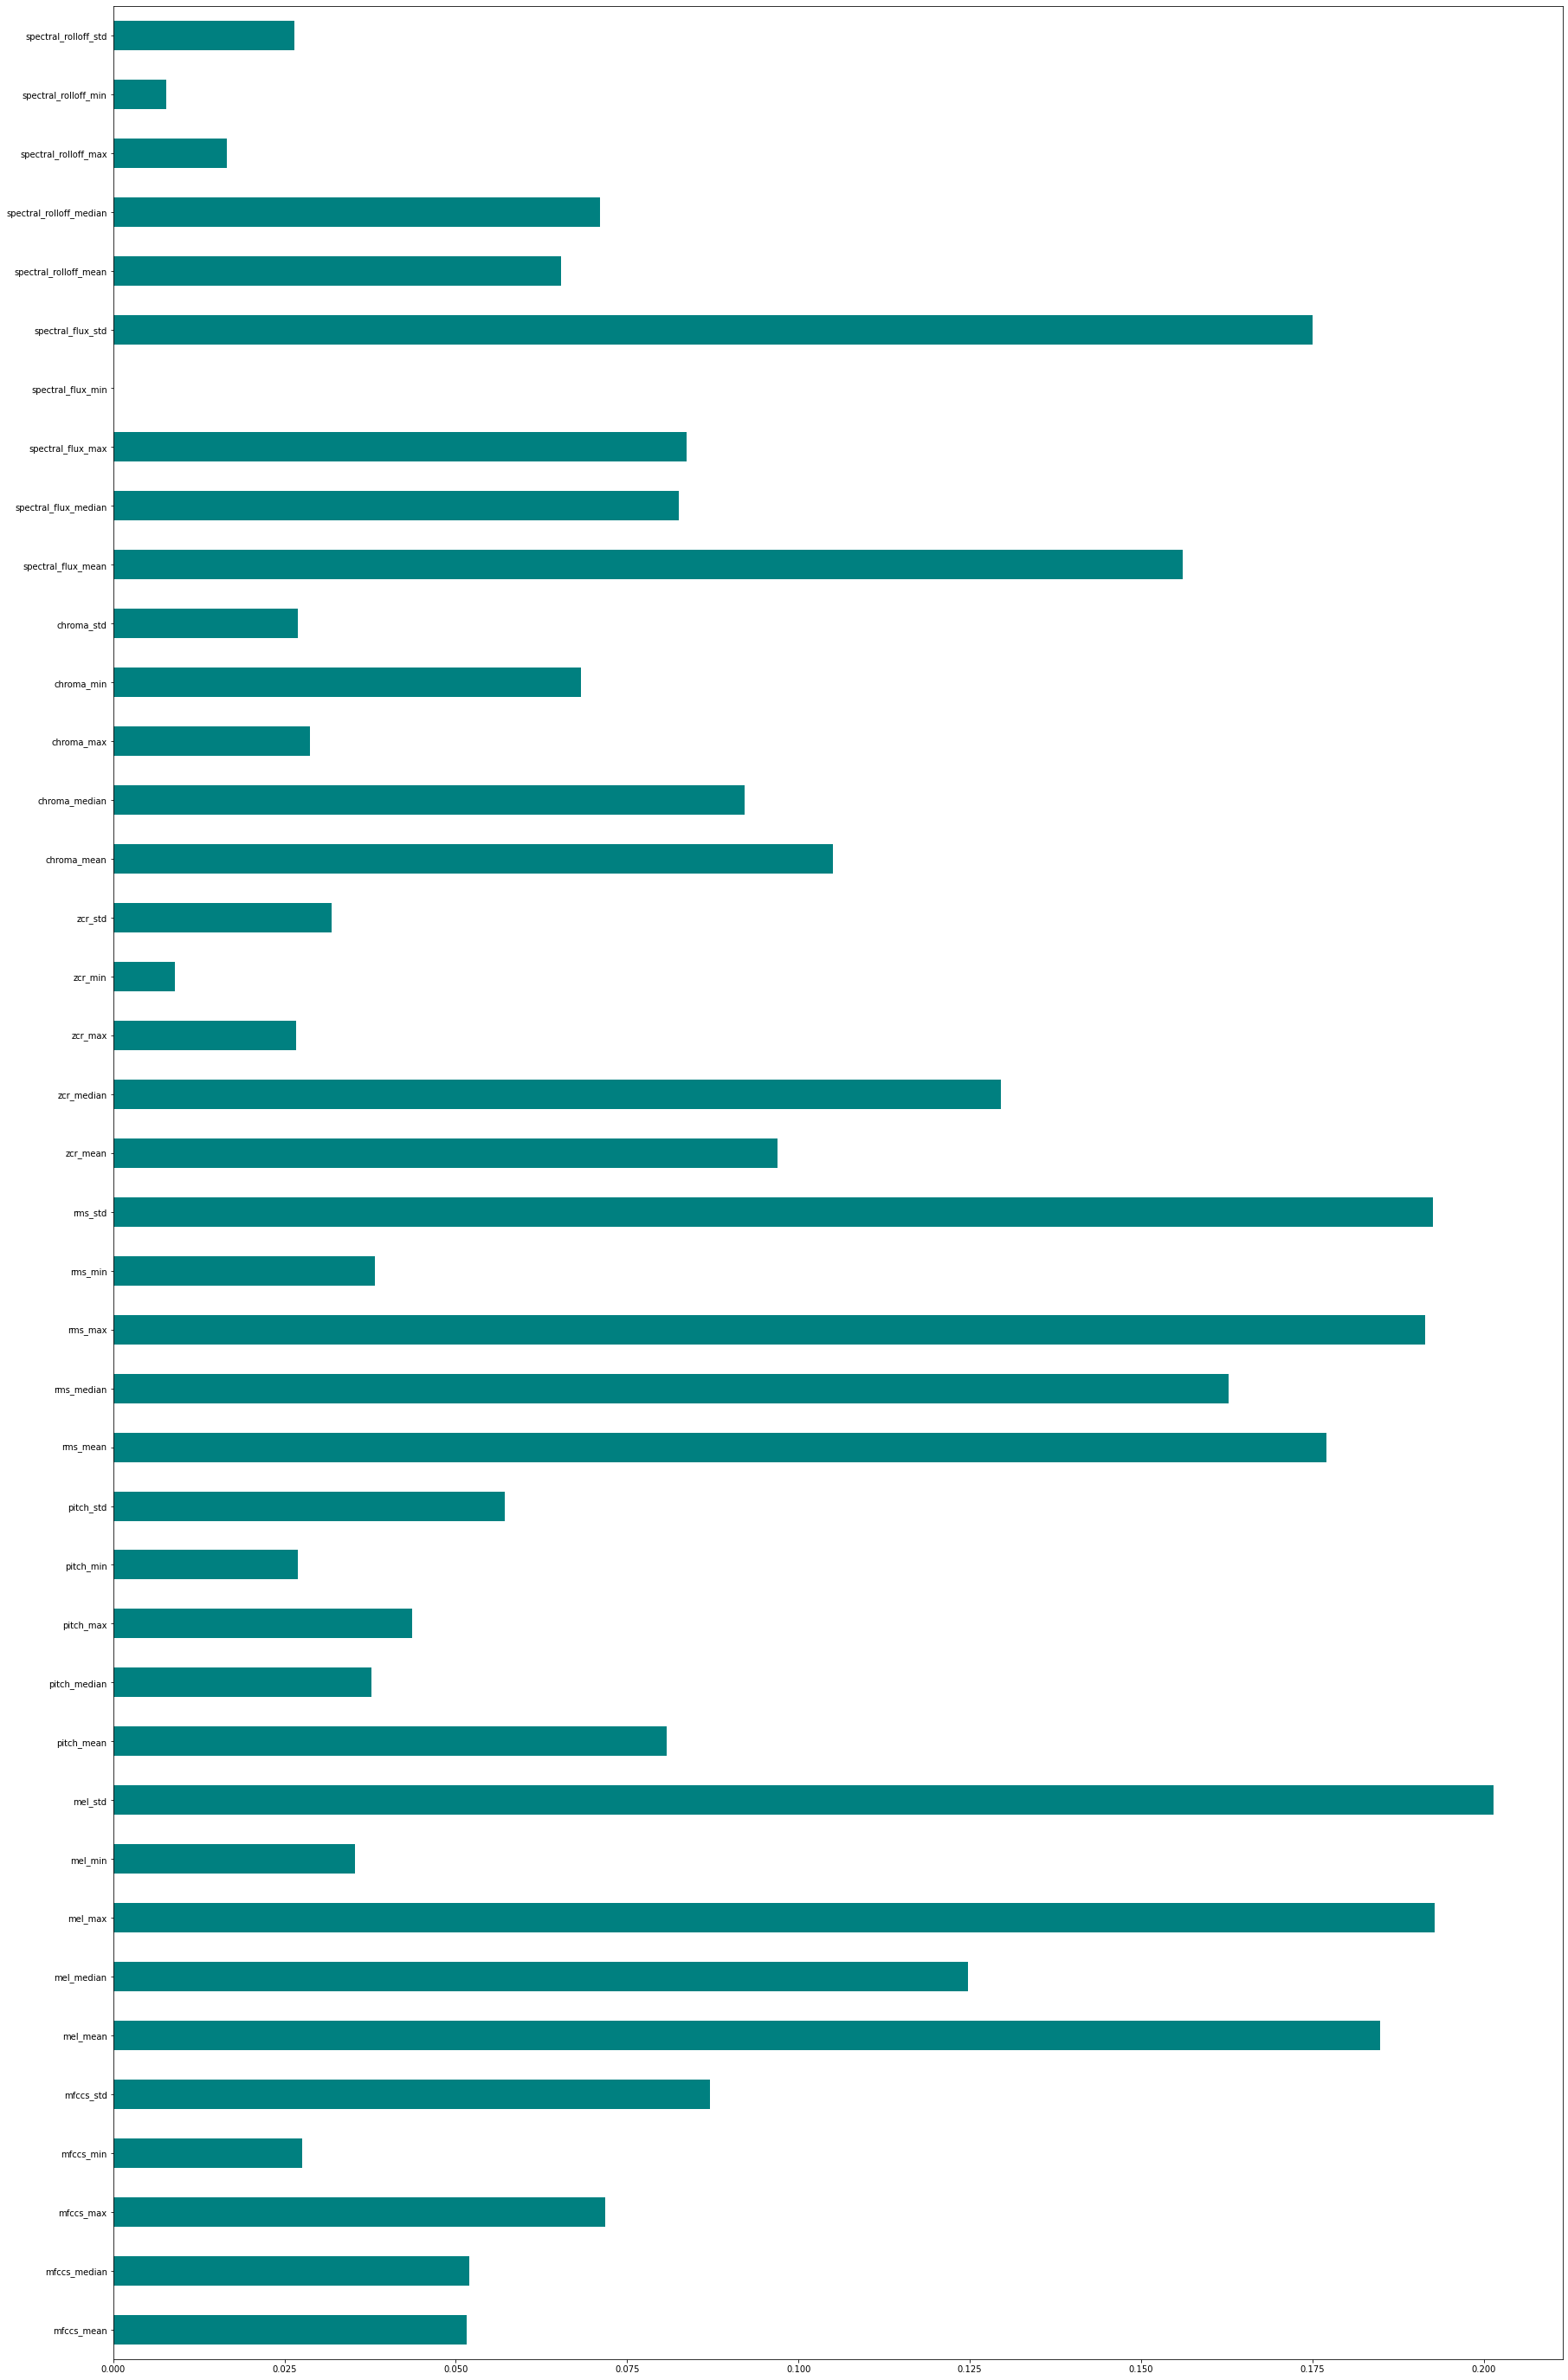

In [4]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

features = df.drop(['emotion', 'file_name'], axis=1)
labels = df['emotion']

importances = mutual_info_classif(features, labels)
feat_importances = pd.Series(importances, features.columns)
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(50)

plt.rc('axes', labelsize=50)
feat_importances.plot(kind='barh', color='teal')
plt.show()